Importing necessary libraries/packages

In [1]:
import numpy as np
import sep

Importing necessary libraries/packages / Enabling inline matplotlib plts, more dynamic graphs, defining default plot sizes.

In [96]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.visualization import make_lupton_rgb, LinearStretch

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [97]:
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data = hdul[0].data

In [98]:
#m, s = np.mean(data), np.std(data)
#plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
#plt.colorbar();

In [99]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [100]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [101]:
bkg_image = bkg.back()

In [102]:
# subtract the background
data_sub = data - bkg


In [103]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [104]:
# how many objects were detected
len(objects)

8640

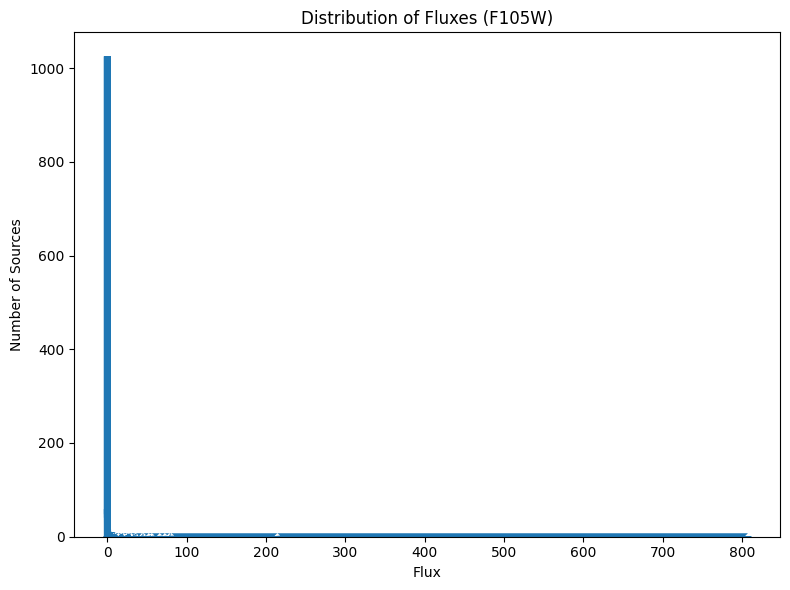

Mean flux: 0.36
Median flux: 0.03
Standard deviation of fluxes: 9.24
Largest flux: 807.30
Position of largest flux: 1914.25
Standard deviations from mean: 87.30


In [105]:
# Histogram of fluxes
plt.figure(figsize=(8, 6))
plt.hist(flux, bins='auto', histtype='step', linewidth=5)
plt.xlabel('Flux')
plt.ylabel('Number of Sources')
plt.title('Distribution of Fluxes (F105W)')
plt.tight_layout()
plt.show()

# Mean, median, and standard deviation of fluxes
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)

print(f"Mean flux: {mean_flux:.2f}")
print(f"Median flux: {median_flux:.2f}")
print(f"Standard deviation of fluxes: {std_flux:.2f}")

# Largest outlier
max_flux = np.max(flux)
max_flux_index = np.argmax(flux)
max_flux_position = (objects['x'][max_flux_index], objects['y'][max_flux_index])
max_flux_std = (max_flux - mean_flux) / std_flux

print(f"Largest flux: {max_flux:.2f}")
print(f"Position of largest flux: {max_flux_position[0]:.2f}")
print(f"Standard deviations from mean: {max_flux_std:.2f}")

In [106]:
#from matplotlib.patches import Ellipse

# plot background-subtracted image
#fig, ax = plt.subplots()
#m, s = np.mean(data_sub), np.std(data_sub)
#im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
#               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
#for i in range(len(objects)):
#    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
#               width=6*objects['a'][i],
#                height=6*objects['b'][i],
#                angle=objects['theta'][i] * 180. / np.pi)
#    e.set_facecolor('none')
#    e.set_edgecolor('red')
#    ax.add_artist(e)
#plt.savefig("detected.png")

My attempt of making an false RGB image (an attempt was definitely made)

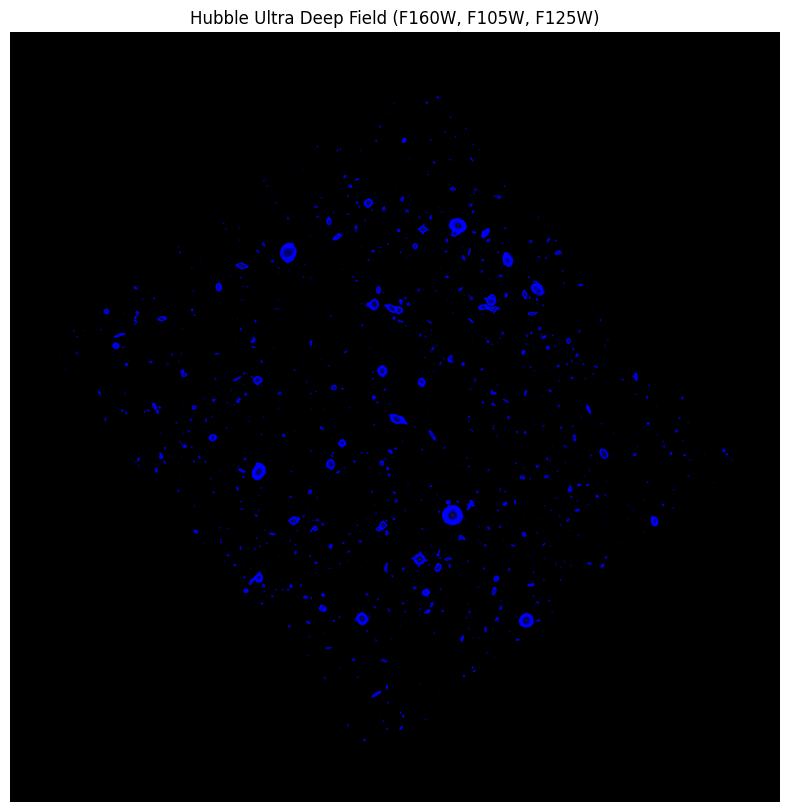

In [107]:
# Load the FITS files for each filter
f160w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')
f125w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_wht.fits')
f105w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

f160w_norm = LinearStretch()(f160w)
f125w_norm = LinearStretch()(f125w)
f105w_norm = LinearStretch()(f105w)

# Create the RGB image using make_lupton_rgb 
rgb_image = make_lupton_rgb(image_r = f105w_norm, image_g = f160w_norm, image_b = f125w_norm, Q=500, stretch=5.5, minimum=0.34)

# Display the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.title('Hubble Ultra Deep Field (F160W, F105W, F125W)')
plt.axis('off')

# Saving the image as a PNG file
plt.savefig('udf_rgb.png', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()